In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from skimage import io
import os
import cv2
import math

In [2]:
%matplotlib inline

In [3]:
#Loading an image for compression.
input_image_file = "lena.png"

In [4]:
#Number of colors for the output image (i.e. number of clusters(K)).
num_colors = num_clusters = 16

In [5]:
#Loading the data as an array of pixels.
input_img = img.imread(input_image_file)

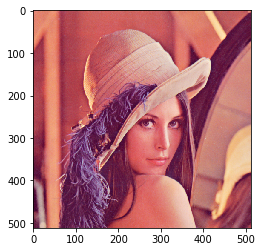

In [6]:
#Plotting the input image.
plt.imshow(input_img)
plt.show()

In [7]:
#Identify the number of channels in the image.
channels = input_img.shape[-1]
channels 

3

In [8]:
#Reshaping the array of pixels.
X = input_img.reshape(-1, channels)
X.shape

(262144, 3)

In [9]:
#Random seed generation for centroid initalization.
seed = 12
np.random.seed(seed)

In [10]:
#Initializing centroids as colors of random pixels of the picture.
centroids = np.asarray([X[i] for i in np.random.choice(range(0, len(X)), num_clusters, replace=False)]) 
centroids.shape

(16, 3)

In [11]:
#Initizlizing a variable for storing closest centroids for every pixel.
closest_centroids = np.zeros(len(X))

In [12]:
#Finding the closest centroid for every data point.
def get_closest_centroids(X, centroids):
    res = [np.argmin([np.sum(np.power(x - c, 2)) for c in centroids]) for x in X]
    return np.asarray(res)

In [13]:
#Moving the centroids to the center of all assigned points.
def move_centroids(X, closest_centroids, num_clusters):
    res = np.zeros((num_clusters, X.shape[-1]))
    for i in range(num_clusters):
        assigned_points = X[closest_centroids == i] 
        res[i] = np.mean(assigned_points, axis=0)
    return res

In [14]:
#Computting the k-means cost function(WCSS).
def kmeans_objective(X, centroids, closest_centroids):
    cost_sum = 0
    for i in range(len(centroids)):
        assigned_points = X[closest_centroids == i]
        cost_sum += np.sum(np.power(assigned_points - centroids[i], 2))
    
    return cost_sum

In [15]:
#Implementing the k-means iterations until convergence.
#Calculating the WCSS(Within Cluster Sum of Squares)
objective_history = []
convergence = False
iteration = 0
while not convergence: 
    
    closest_centroids = get_closest_centroids(X, centroids)
    centroids = move_centroids(X, closest_centroids, num_clusters)  
    objective = kmeans_objective(X, centroids, closest_centroids)
    objective_history.append(objective)
    
    iteration += 1
    convergence = len(objective_history) > 2 and (objective_history[-2]/objective_history[-1] < 1.01 or iteration> 50)
    
    print("Iteration: {0:2d}    WCSS: {1:.3f}".format(iteration, objective))

Iteration:  1    WCSS: 1608.329
Iteration:  2    WCSS: 1247.105
Iteration:  3    WCSS: 1074.619
Iteration:  4    WCSS: 1005.218
Iteration:  5    WCSS: 978.338
Iteration:  6    WCSS: 963.377
Iteration:  7    WCSS: 953.676
Iteration:  8    WCSS: 946.410


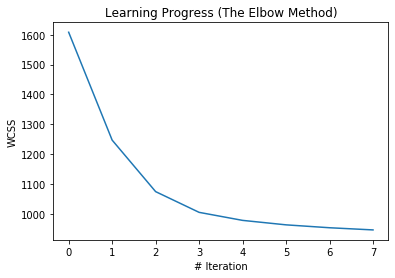

In [16]:
#Plotting the "Elbow" graph
ax = plt.plot(objective_history)[0].axes

ax.set(xlabel="# Iteration")
ax.set(ylabel="WCSS")
ax.set(title="Learning Progress (The Elbow Method)")

plt.show()

In [17]:
#Represent each point as a closest centroid.
output_img = centroids[closest_centroids].reshape(input_img.shape)

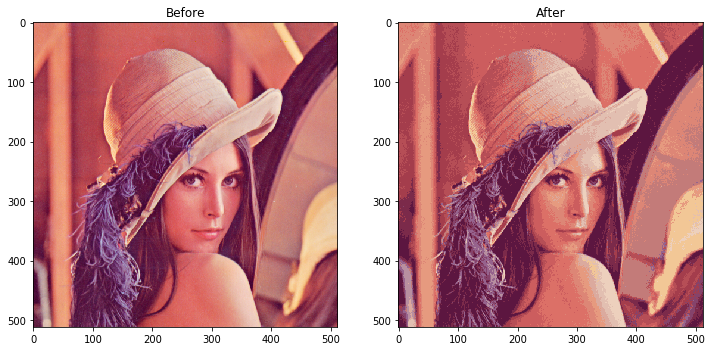

In [18]:
#Comparing the original and compressed image.
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(12, 12))

ax_before.imshow(input_img)
ax_after.imshow(output_img)

ax_before.set(title="Before")
ax_after.set(title="After")

plt.show()

In [19]:
#Saving the compressed image.
io.imsave(fname= "C:\\Users\\moham\\Image Compression\\OutputImages\\OutputImage.png" , arr=output_img)
output_image_file = "C:\\Users\\moham\\Image Compression\\OutputImages\\OutputImage.png"

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [20]:
#Comparing the size of the original and compressed image.
before = (os.path.getsize(input_image_file))/1024
after = (os.path.getsize(output_image_file))/1024

print("Size Before Compression ",'%.2f'%(before), "KB")
print("Size After Compression  ",'%.2f'%(after) , "KB")

Size Before Compression  462.73 KB
Size After Compression   98.23 KB


In [21]:
# Measuring the Compression Ratio.
compression_ratio=before/after
print("Compression Ratio  ",'%.2f'%(compression_ratio))

Compression Ratio   4.71


In [22]:
# Measuring the Mean Squared Error(MSE) between the input and output images.
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [23]:
# Measuring The Peak Signal to Noise Ratio (PSNR) between the input and output images.
PIXEL_MAX = 255.0
def psnr(img1, img2):
    m = mse(img1, img2)
    if m == 0:
      return np.finfo(np.float32).max
    else:
      return 10 * math.log10(PIXEL_MAX * PIXEL_MAX / m)

In [24]:
image = cv2.imread(input_image_file)
image2 = cv2.imread(output_image_file)

In [25]:
m = mse(image,image2)
print("MSE = ",'%.2f'%(m))

MSE =  235.02


In [26]:
print("PSNR = ",np.finfo(np.float32).max)

PSNR =  3.4028235e+38
